<a href="https://colab.research.google.com/github/LennyRBriones/object_detection/blob/main/object_detection_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generating a sliding window

getting an specific version to avoid incompatibility

In [201]:
!pip install opencv-python-headless==4.7.0.72

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [202]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

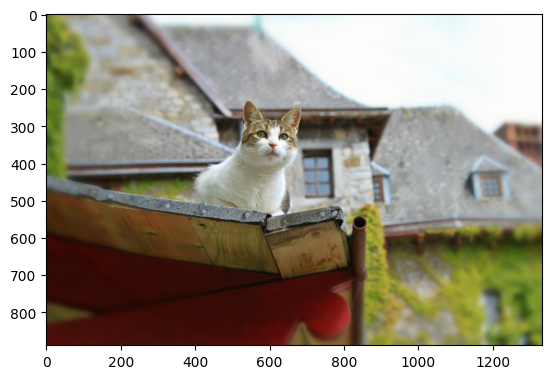

In [203]:
np_image = cv2.imread("/content/drive/MyDrive/Object detection practices/nuevo_michi.jpg") #read the image
np_image = cv2.cvtColor(np_image, cv2.COLOR_BGR2RGB) # color order to rgb
np_image = cv2.resize(np_image, dsize=(1333, 889))
plt.imshow(np_image)

In [383]:
def sliding_window(image, step, ws):
  for y in range(0, image.shape[0] -ws[1]+1, step): # range oh the image in 1 +1 to borders
    for x in range(0, image.shape[1] -ws[0]+1, step): # the same in the x layer
      yield (x, y, image[y:y + ws[1], x:x +ws[0]]) # generator of the windows

In [402]:
windows = sliding_window(np_image, 220, (220, 230))

In [387]:
os.makedirs("sliding_window") #making the directory

FileExistsError: ignored

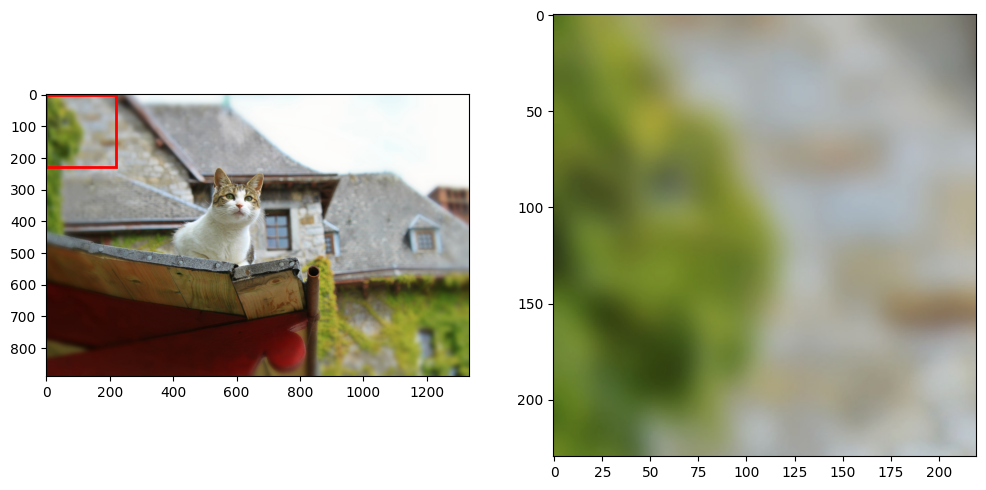

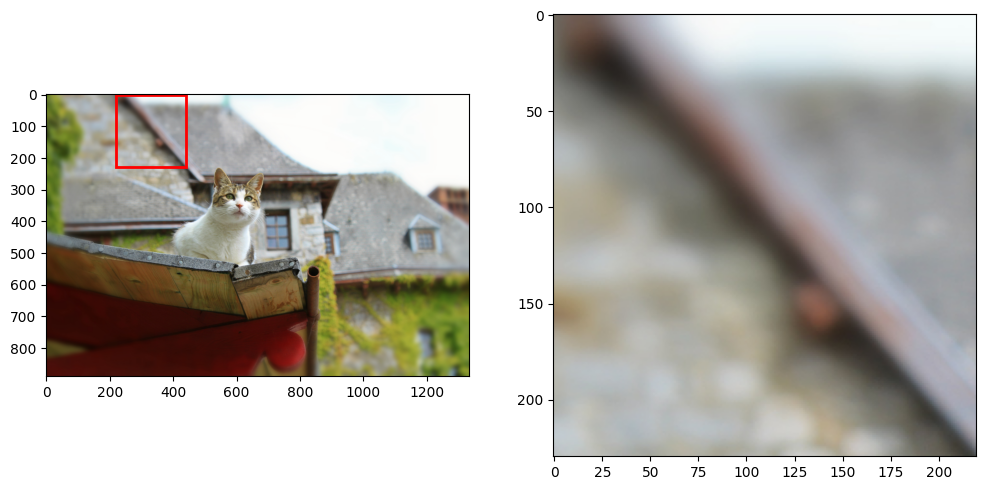

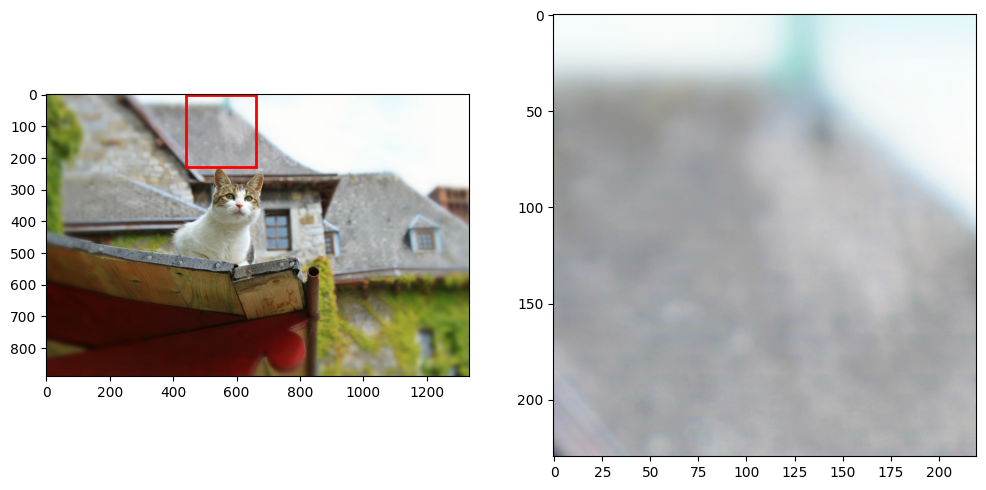

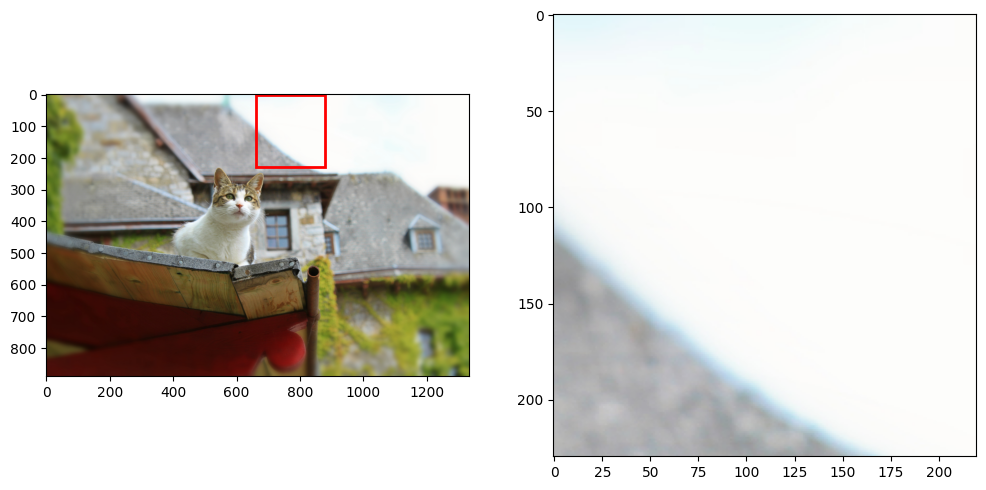

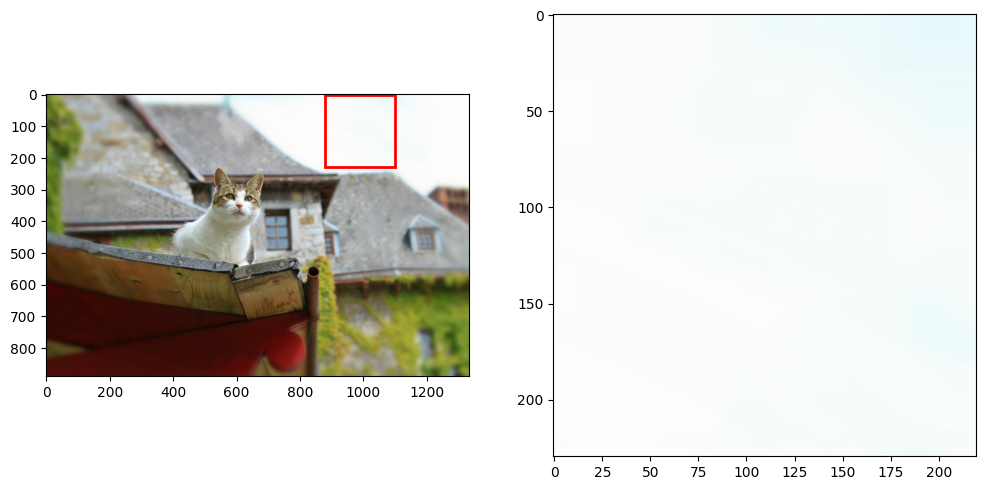

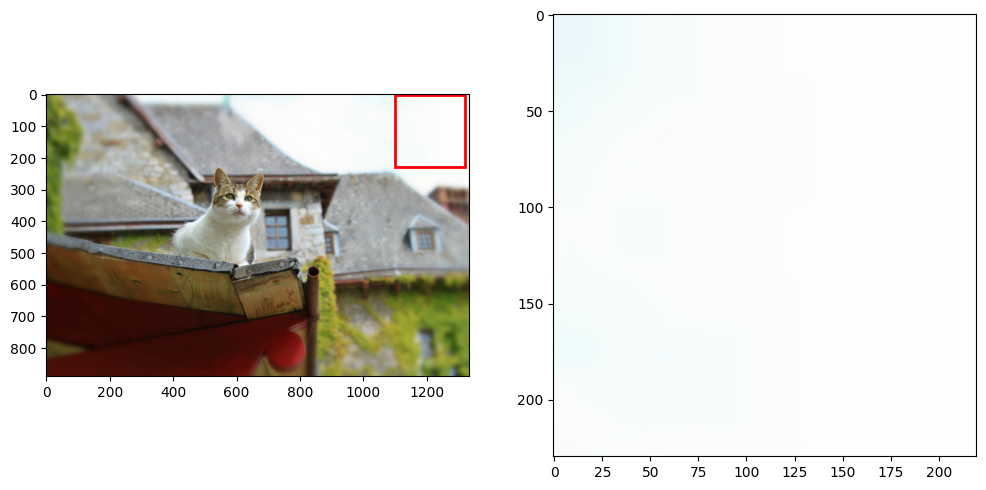

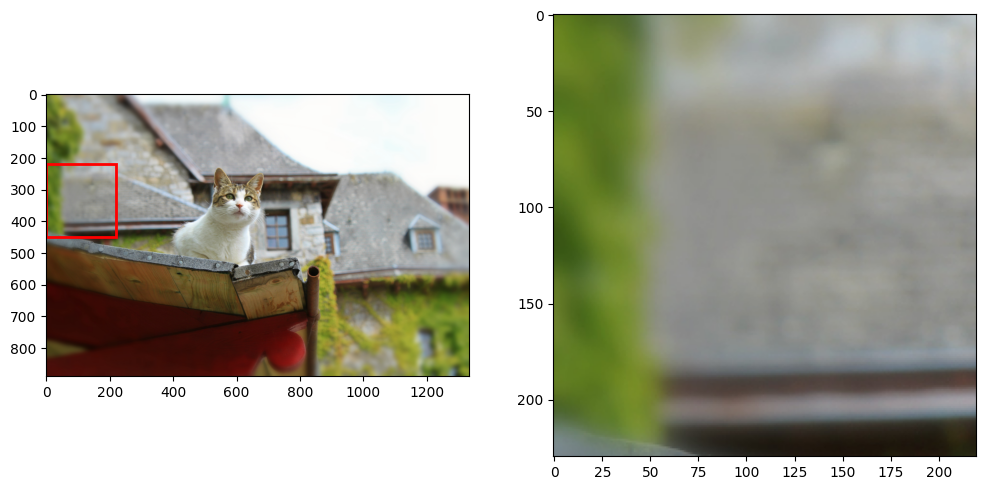

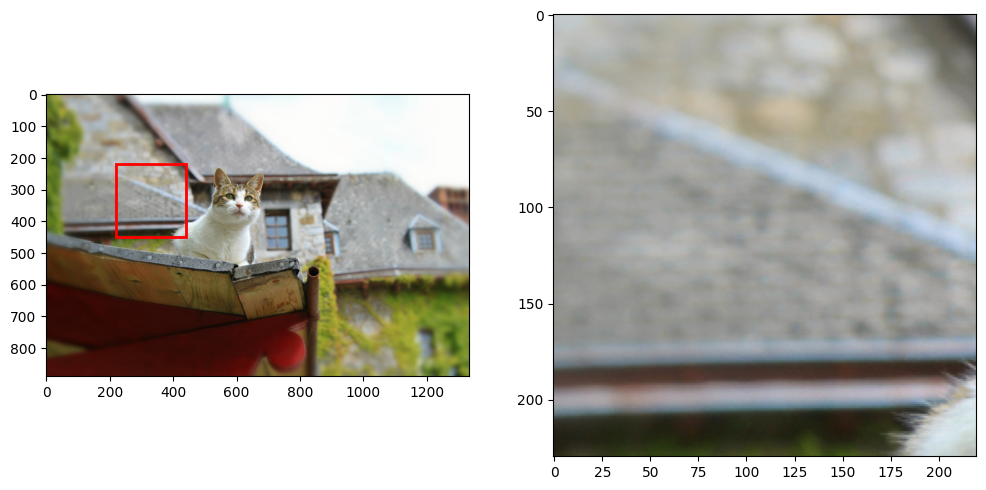

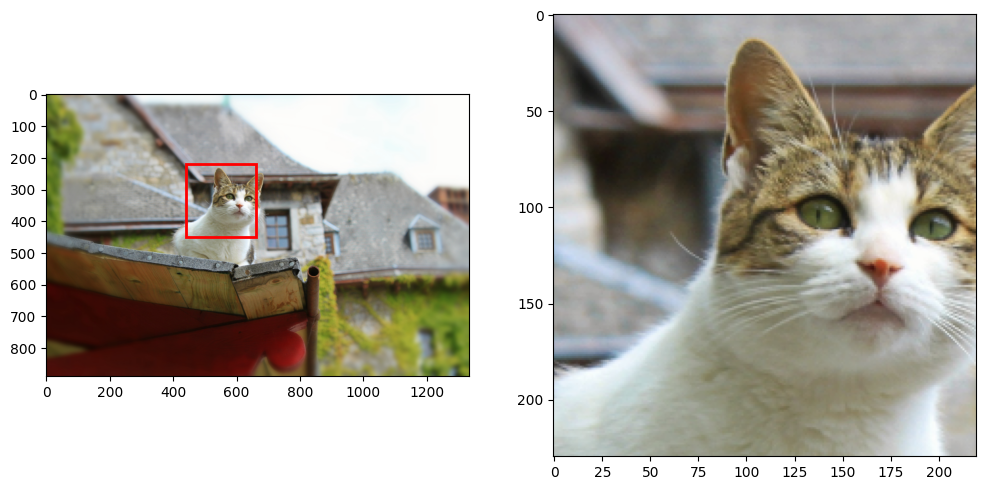

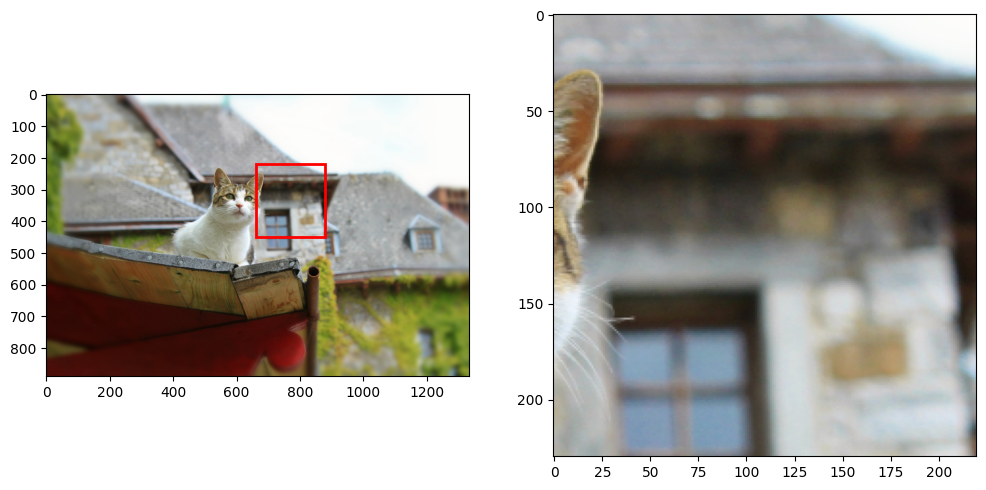

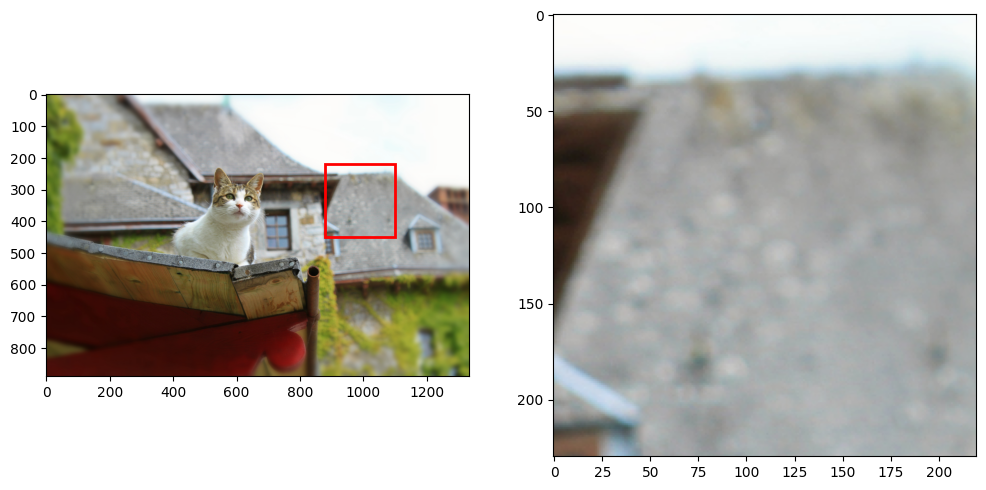

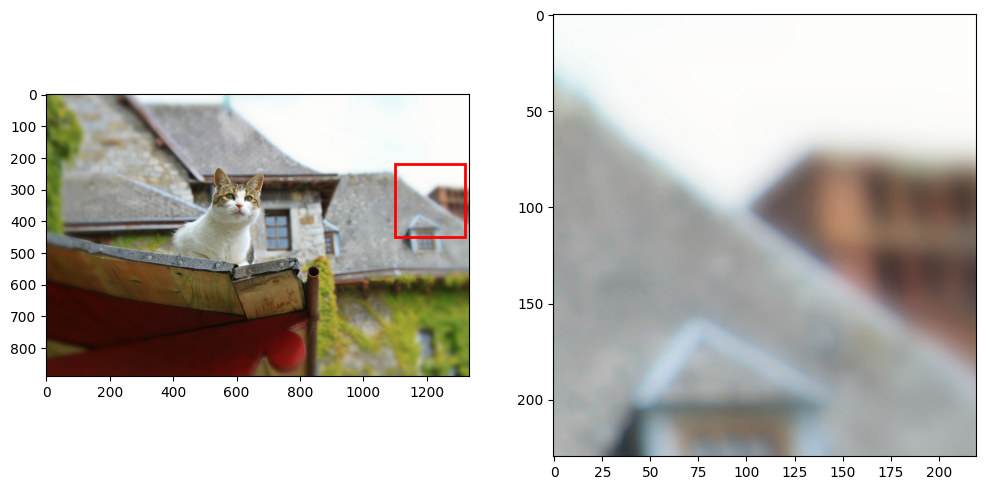

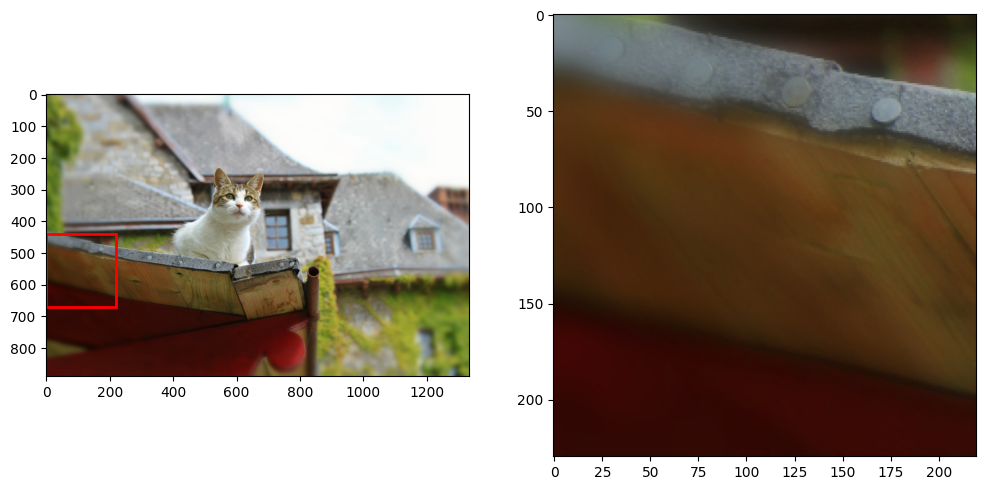

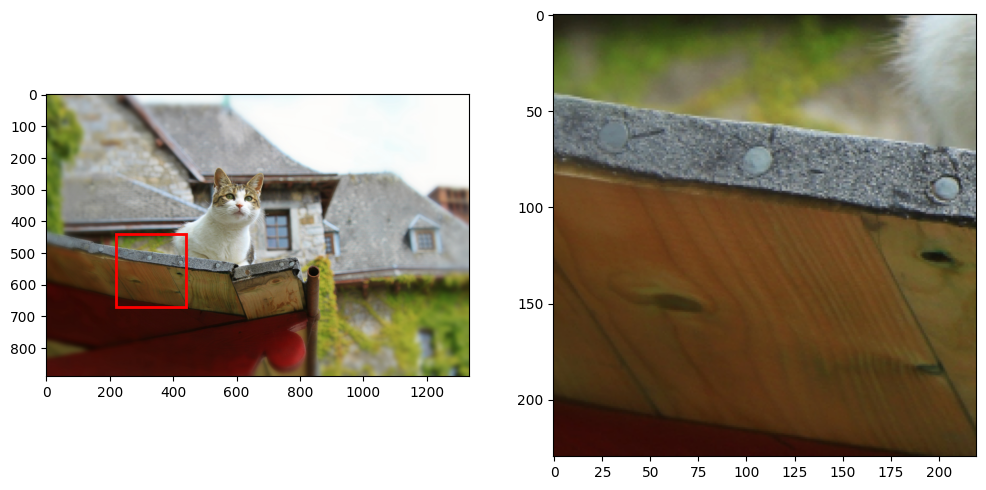

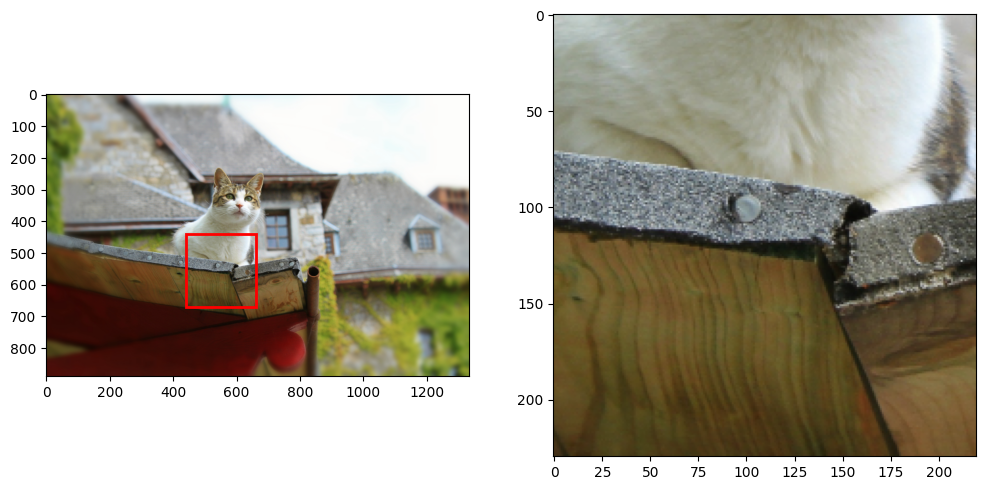

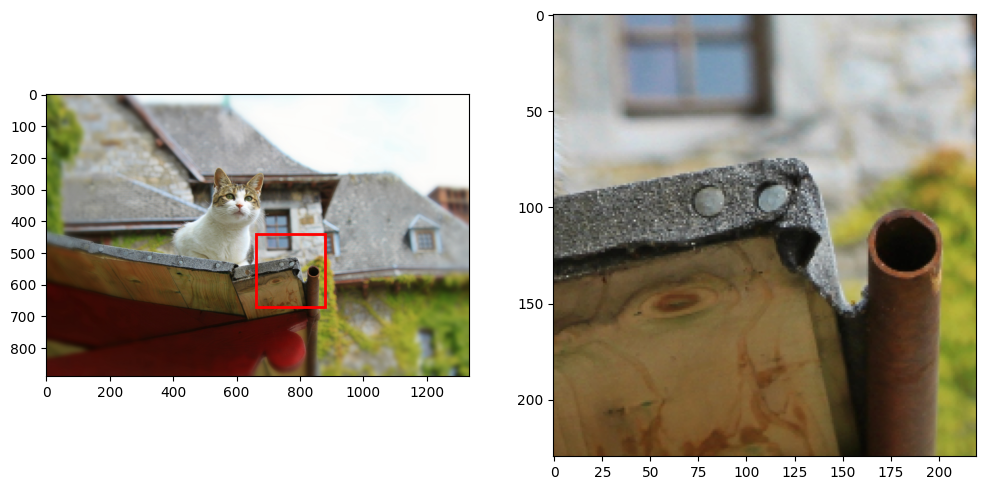

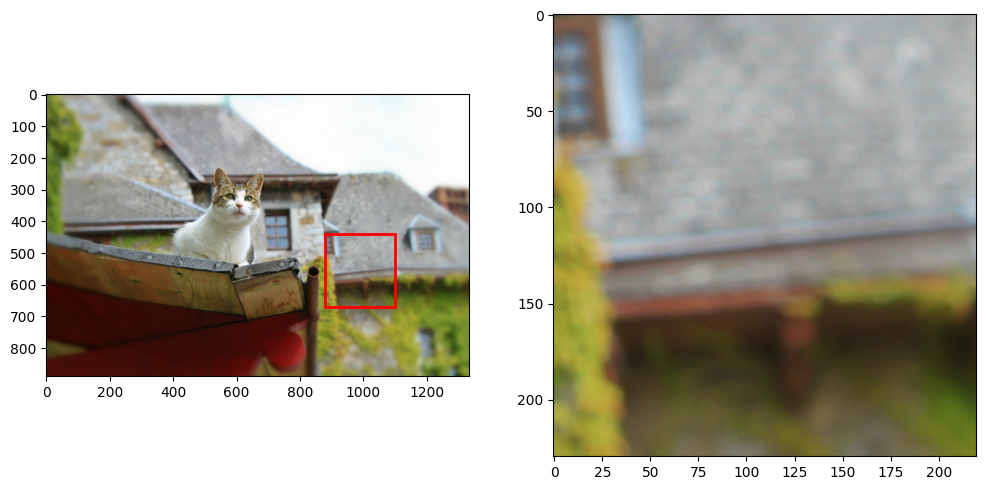

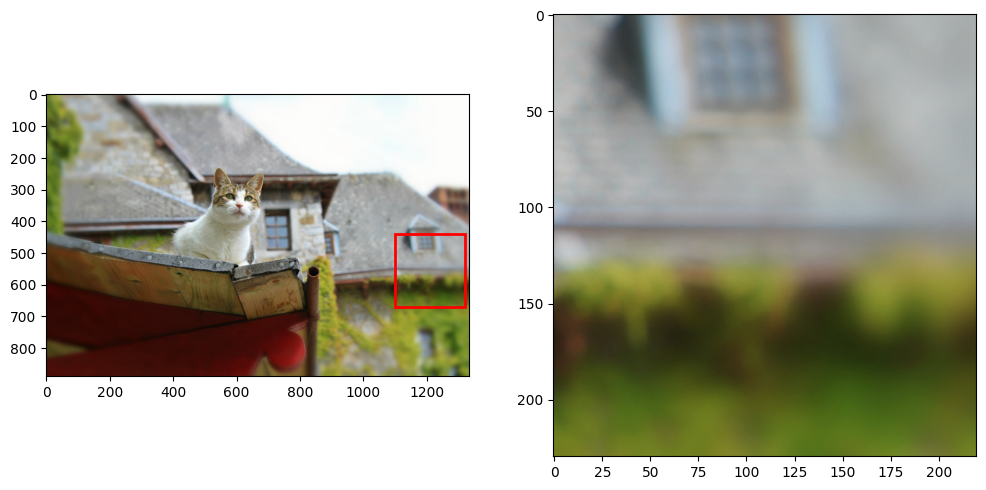

In [403]:
for x, window in enumerate(windows):
  f, axarr = plt.subplots(1, 2, figsize=(12, 12))
  axarr[0].imshow(np_image)                                              #color of the patch    #not fill patch
  rect = patches.Rectangle((window[0], window[1]), 220, 230, linewidth = 2, edgecolor = "r" , facecolor ="none")
  axarr[0].add_patch(rect) #adding the patch, rectangle in the image
  axarr[1].imshow(window[2]) #show where is the patch in the axe 1
  f.savefig("sliding_window/" +str(x) + ".png", dpi=f.dpi ) #saving the images

In [389]:
image_folder = "sliding_window"
video_name = "michi_video.avi"

images = [img for img in os.listdir(image_folder) if img.endswith(".png")] #saving only the images

In [390]:
images = sorted(images, key = lambda x: int(os.path.splitext(x)[0])) 
#sorting the images by text as those was save

In [391]:
frame = cv2.imread(os.path.join(image_folder, images[0]))
#using the first image as the frame

In [392]:
height, width, layer = frame.shape
#frame shape is the size of our image

In [393]:
video = cv2.VideoWriter(video_name, 0, 1, (width, height))
#Generating the video using the size of the frame

In [394]:
for image in images:
  video.write(cv2.imread(os.path.join(image_folder, image)))
video.release()

#writing image per image to generate the video

# Working with object detection metrics

In [395]:
import numpy as np 

In [396]:
## border box determinator
def bb_intersection_over_union(ground_truth_bbox, predicted_bbox):
 xA = max(ground_truth_bbox[0], predicted_bbox[0])
 yA = max(ground_truth_bbox[1], predicted_bbox[1])
 xB = min(ground_truth_bbox[2], predicted_bbox[2])
 yB = min(ground_truth_bbox[3], predicted_bbox[3])

 intersection_area = max(0, xB-xA + 1) * max(0, yB-yA + 1)

 ground_truth_bbox_area = (ground_truth_bbox[2] - ground_truth_bbox[1] + 1) * (ground_truth_bbox[3] - ground_truth_bbox[1] + 1)
 predicted_bbox_area = (predicted_bbox[2] - predicted_bbox[0] + 1) * (predicted_bbox[3] - predicted_bbox[1] + 1)

 iou = intersection_area / float(ground_truth_bbox_area + predicted_bbox_area - intersection_area)

 return iou

In [404]:
image = cv2.imread("/content/drive/MyDrive/Object detection practices/nuevo_michi.jpg")
image = cv2.resize(image, dsize=(1333, 889))
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [405]:
example = ([500, 220, 630, 420], [500, 220, 690, 420])
       #left  #above  #right #under
         #Red                      #Green

In [406]:
iou = bb_intersection_over_union(example[0], example[1])

In [407]:
print(" IoU Value " + str(iou))

 IoU Value 0.2781316348195329


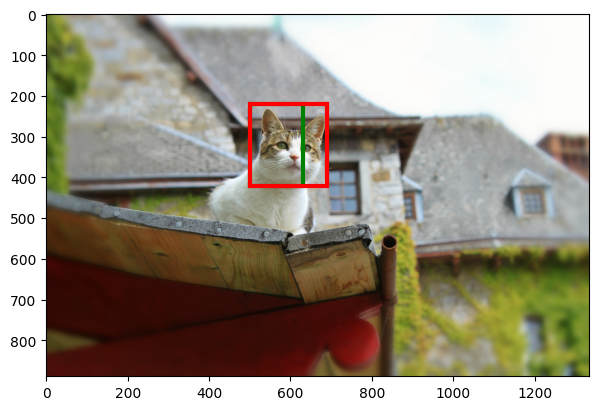

In [408]:
fig, ax = plt.subplots(figsize= (7,7))

ax.imshow(image)

rect = patches.Rectangle(tuple(example[0][:2]), example[0][2]- example[0][0], example[0][3] - example[0][1], linewidth=3, edgecolor="g", facecolor="none")
ax.add_patch(rect)

rect = patches.Rectangle(tuple(example[1][:2]), example[1][2]- example[1][0], example[1][3] - example[1][1], linewidth=3, edgecolor="r", facecolor="none")
ax.add_patch(rect)

plt.show()